# Image classification -  VGGNet, ResNet, Inception, and Xception with Keras

### State-of-the-art deep learning image classifiers in Keras

Keras ships out-of-the-box with five Convolutional Neural Networks that have been pre-trained on the ImageNet dataset.

The pre-trained networks inside of Keras are capable of recognizing 1,000 different object categories, similar to objects we encounter in our day-to-day lives with high accuracy.

Original source https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

In [2]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
from pyimagesearch.imageutils import display


In [3]:
args={}

args['model'] = "vgg16"
# args['model'] = "inception"


images =[
    "images/classification/bmw.png",
    "images/classification/soccer_ball.jpg",
    "images/classification/boat.png",
    "images/classification/office.png",
    "images/classification/clint_eastwood.jpg",
    "images/classification/jemma.png",
]


# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if args["model"] in ("inception", "xception"):
	inputShape = (299, 299)
	preprocess = preprocess_input

# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(args["model"]))
Network = MODELS[args["model"]]
model = Network(weights="imagenet")

[INFO] loading vgg16...


[INFO] loading and pre-processing image...
[INFO] classifying image with 'vgg16'...
1. convertible: 98.09%
2. sports_car: 0.63%
3. car_wheel: 0.43%
4. amphibian: 0.19%
5. beach_wagon: 0.18%
[INFO] classifying image with 'vgg16'...
1. soccer_ball: 93.43%
2. rugby_ball: 6.06%
3. golf_ball: 0.20%
4. volleyball: 0.17%
5. tennis_ball: 0.05%
[INFO] classifying image with 'vgg16'...
1. wreck: 99.89%
2. seashore: 0.04%
3. cliff: 0.02%
4. sea_lion: 0.02%
5. pirate: 0.01%
[INFO] classifying image with 'vgg16'...
1. studio_couch: 39.29%
2. table_lamp: 25.39%
3. rocking_chair: 5.01%
4. quilt: 2.64%
5. grand_piano: 2.48%
[INFO] classifying image with 'vgg16'...
1. fur_coat: 55.19%
2. stole: 5.19%
3. cardigan: 3.31%
4. bow_tie: 1.91%
5. rifle: 1.77%
[INFO] classifying image with 'vgg16'...
1. beagle: 47.89%
2. bluetick: 13.34%
3. quilt: 3.83%
4. bath_towel: 3.74%
5. Chihuahua: 3.28%


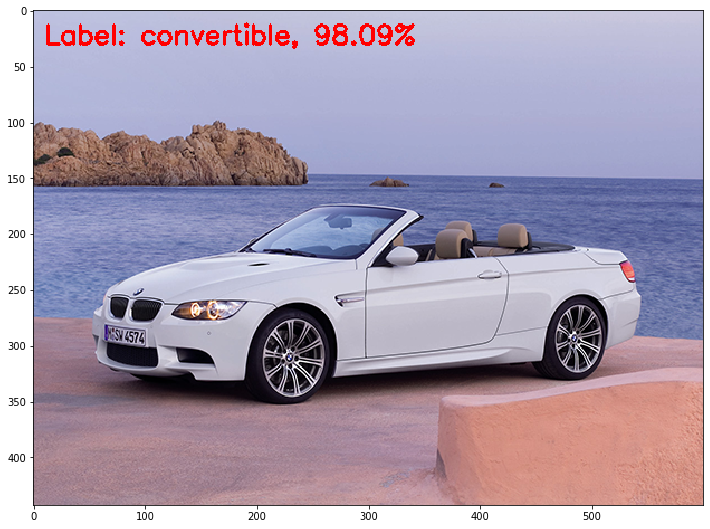

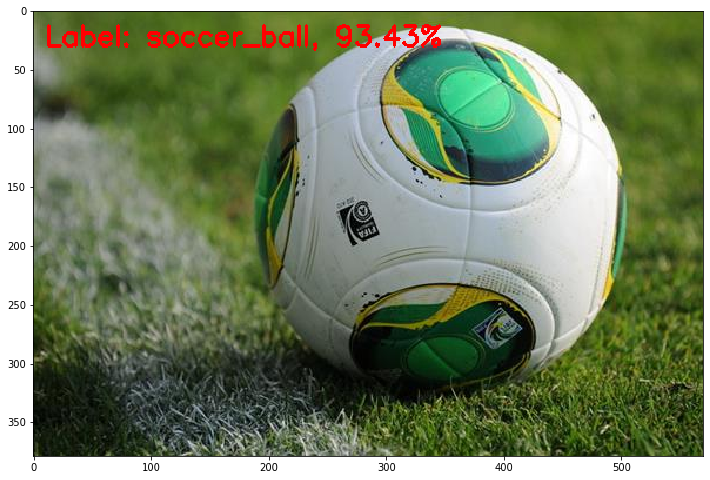

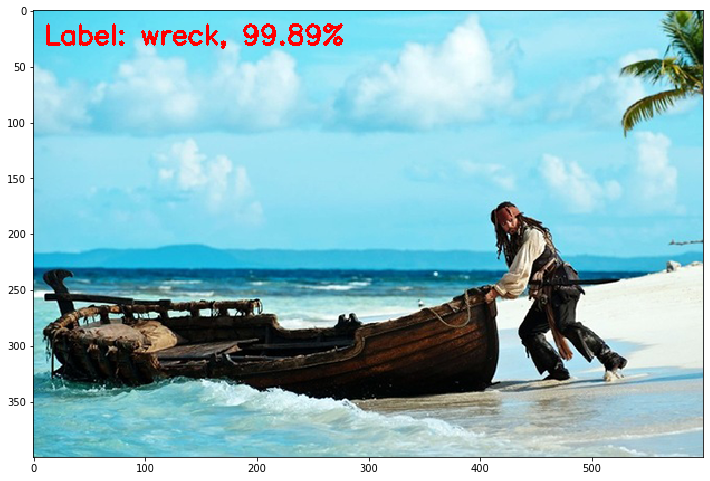

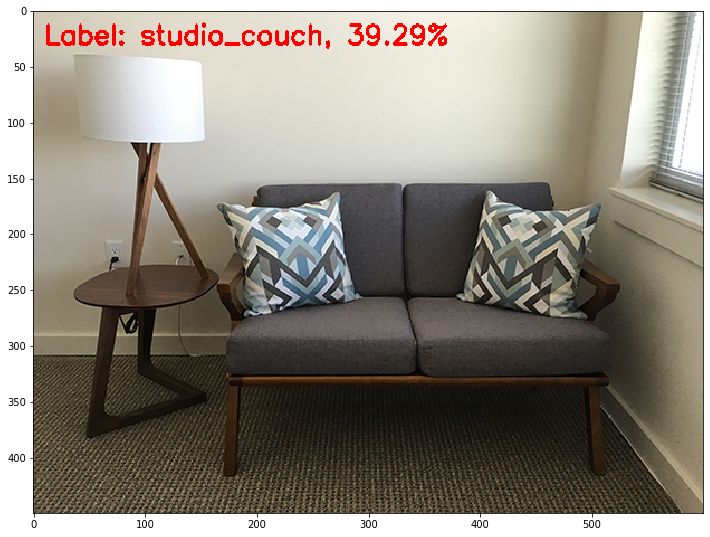

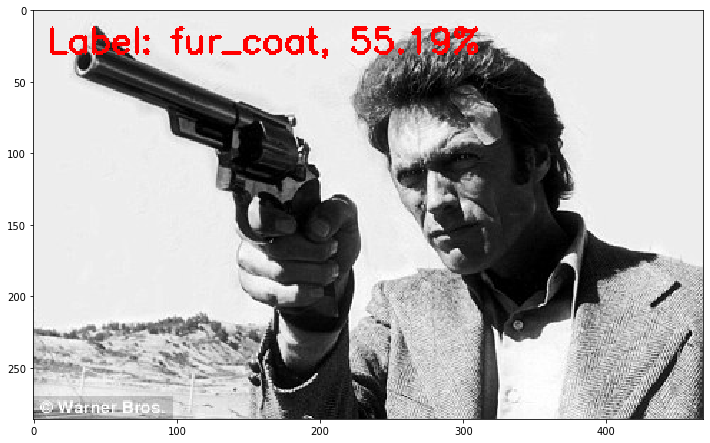

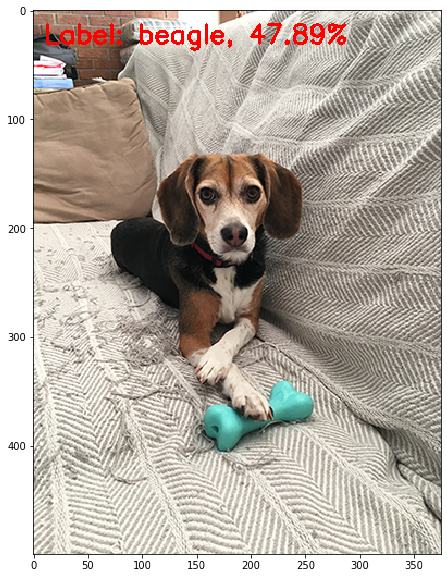

In [4]:
print("[INFO] loading and pre-processing image...")
for img in images:
	# load the input image using the Keras helper utility while ensuring
	# the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network

    image = load_img(img, target_size=inputShape)
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through the network
    image = np.expand_dims(image, axis=0)
#     print(image.shape)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # classify the image
    print("[INFO] classifying image with '{}'...".format(args["model"]))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

    # load the image via OpenCV, draw the top prediction on the image,
    # and display the image to our screen
    orig = cv2.imread(img)
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    display(orig)